In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('.\covid_train.csv')
test = pd.read_csv('.\covid_test.csv')
df.head(50)

print(df.shape)#14851 rows,8 cols
##print(test.shape)#14851 rows,8 cols
#print(df.dtypes)
#df.describe(include='all')
#df_grouped=df.groupby('Outcome1')
#df_grouped.describe(include='all')
df=df.dropna()
test=test.dropna()

# one hot encode input variables
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


mapper = {'<20':0, '20s':1,'30s': 2 ,'40s':3 ,'50s':4, '60s': 5, '70s': 6,'80s': 7, '90s':8}
df['Age_Group']= (df['Age_Group'].replace(mapper))
test['Age_Group']= (test['Age_Group'].replace(mapper))

df=df.drop(['Client_Gender'],axis=1)
df=df.drop(['Outbreak_Related'],axis=1)
df=df.drop(['Case_AcquisitionInfo'],axis=1)
test=test.drop(['Client_Gender'],axis=1)
test=test.drop(['Outbreak_Related'],axis=1)
test=test.drop(['Case_AcquisitionInfo'],axis=1)
df=df.drop(['Reporting_PHU_City'],axis=1)
test=test.drop(['Reporting_PHU_City'],axis=1)
onehot_encoder = OneHotEncoder(sparse=False)
x, y = df.drop('Outcome1',axis=1), df['Outcome1']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
#x = label_encoder.fit_transform(df['Reporting_PHU_City'])
print(x)
print(y)


(14851, 8)
       Age_Group  Reporting_PHU_Latitude  Reporting_PHU_Longitude
2              8               44.410713               -79.686306
4              8               45.345665               -75.763912
5              5               44.048023               -79.480239
8              8               43.656591               -79.379358
9              8               43.656591               -79.379358
...          ...                     ...                      ...
14837          7               43.116537               -79.241220
14838          7               43.647471               -79.708893
14839          7               44.048023               -79.480239
14845          7               43.656591               -79.379358
14848          7               43.116537               -79.241220

[5830 rows x 3 columns]
[2 0 0 ... 0 0 0]


In [2]:
#Splitting into train,validation and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=275)

X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.25, random_state=275)

#Variables for k-folds cross-validation
from sklearn.model_selection import cross_val_score
xcv=np.concatenate((X_train, X_val), axis=0)
ycv=np.concatenate((y_train, y_val), axis=0)

In [10]:
#random forest

scoreList1=[]
scoreList2=[]
scoreList3=[]
scoreList4=[]

scoreList10=[]
scoreList20=[]
scoreList30=[]

#Tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import tree
for i in range(len(max__depth)):
    model = tree.DecisionTreeClassifier(max_depth=max__depth[i])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #tree.plot_tree(model)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    scoreList2 = cross_val_score(model, xcv, ycv, cv=10)
    print('scorelist2',max__depth[i],scoreList2)
    print('scorelist2mean',(scoreList2).mean())
    scoreList3.append(scoreList2.mean())
    scoreList1.append((model.score(X_val, y_val))*100)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    scoreList4.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

max__depth=[3,5,10,None]
max__tree=[5, 10, 50, 150, 200]
import sklearn
from sklearn import ensemble
print("ver",sklearn.__version__)
from sklearn.ensemble import RandomForestClassifier
modelForest=ensemble.RandomForestClassifier()
for j in range (len(max__tree)):
    for i in range(len(max__depth)):
        modelForest = ensemble.RandomForestClassifier(n_estimators=max__tree[j],max_depth=max__depth[i])
        modelForest.fit(X_train, y_train)
        #tree.plot_tree(model)
        scoreList20 = cross_val_score(modelForest, xcv, ycv, cv=10)
        #print('scorelist20',max__depth[i],scoreList20)
        #print('scorelist20mean',(scoreList20).mean())
        scoreList30.append(scoreList20.mean())
        scoreList10.append((model.score(X_val, y_val))*100)
        y_pred = model.predict(X_test)
        # print("mean_kfolds:",scoreList2)
        
scoreList30=(np.array(scoreList30)).reshape(5,4)

print('scoreList30',scoreList30)

[[736   1  13]
 [ 74  51  87]
 [ 66  42  96]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.91       750
           1       0.54      0.24      0.33       212
           2       0.49      0.47      0.48       204

    accuracy                           0.76      1166
   macro avg       0.62      0.56      0.57      1166
weighted avg       0.72      0.76      0.73      1166

scorelist2 3 [0.74732334 0.72805139 0.74518201 0.76445396 0.73175966 0.75107296
 0.72961373 0.75321888 0.75536481 0.74463519]
scorelist2mean 0.7450675942689617
Mean Absolute Error: 0.31046312178387653
Mean Squared Error: 0.44596912521440824
Root Mean Squared Error: 0.6678091982103932
[[735   4  11]
 [ 70  63  79]
 [ 65  47  92]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.91       750
           1       0.55      0.30      0.39       212
           2       0.51      0.45      0.48       204

    accuracy            

df              3          5         10        NaN
5    74.999127  75.965114  75.578204  74.721214
10   74.035162  76.243165  75.492413  75.450000
50   75.686236  76.521905  75.986114  75.492689
150  75.943287  76.650706  75.943057  75.428403
200  75.943287  76.586283  76.178925  75.385531


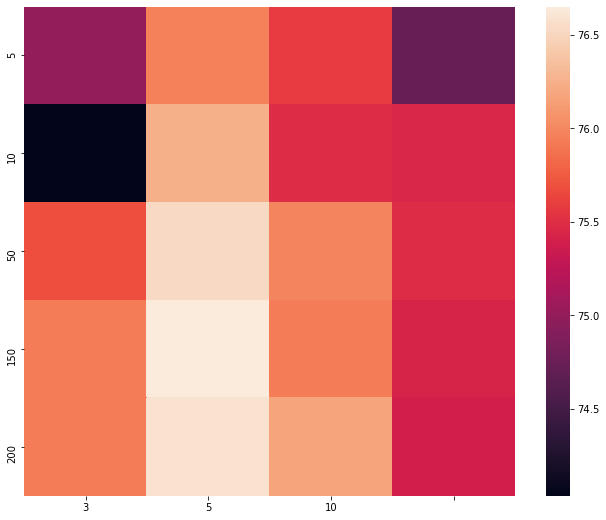

In [9]:
#Plot the accuracy of random forest with respect to number(y-axis of heat map) and depth(x-0axis) of trees

import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(data=scoreList30*100, index=max__tree, columns=max__depth)
print('df',df)

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df)
plt.show()

